# Практическая работа №1 
## по предмету "Системы искусственного интеллекта"

### Выполнила студентка группы БВТ2101 Пьянова Анна

В данной практической работе Вы будете работать с базой данных, посвященной баскетболу, которая включает в себя информацию об игроках, играх и командах. 


### Задание 1
Вам необходимо запустить в docker базу данных PostgreSQL и выгрузить туда все данные из файла nba.sqlite, приложенного к лабороторной работе.
Выгрузить данные можно с помощью утилиты pgloader (https://pgloader.readthedocs.io/en/latest/ref/sqlite.html)

### Задание 2

Загрузите данные из таблицы game. Посмотрите, какие есть типы игр в сезоне (season_type) и количество этих игр.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('game.csv')
data.head()

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,21946,1610610035,HUS,Toronto Huskies,24600001,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,2,0,Regular Season
1,21946,1610610034,BOM,St. Louis Bombers,24600003,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,...,NaN,NaN,NaN,NaN,NaN,25.0,51.0,-5,0,Regular Season
2,21946,1610610032,PRO,Providence Steamrollers,24600002,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,53.0,-6,0,Regular Season
3,21946,1610610025,CHS,Chicago Stags,24600004,1946-11-02 00:00:00,CHS vs. NYK,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,22.0,47.0,-16,0,Regular Season
4,21946,1610610028,DEF,Detroit Falcons,24600005,1946-11-02 00:00:00,DEF vs. WAS,L,0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,50.0,17,0,Regular Season


In [3]:
data['season_type'].value_counts()

season_type
Regular Season    60192
Playoffs           3842
Pre Season         1536
All Star             65
All-Star             63
Name: count, dtype: int64

Нам понадобятся только регулярные игры сезона и play-off. Отделите эти игры в новый датафрейм.

In [4]:
regular_playoff = data[(data['season_type'] == 'Regular Season') | (data['season_type'] == 'Playoffs')].copy()
regular_playoff.head()

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,21946,1610610035,HUS,Toronto Huskies,24600001,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,2,0,Regular Season
1,21946,1610610034,BOM,St. Louis Bombers,24600003,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,...,NaN,NaN,NaN,NaN,NaN,25.0,51.0,-5,0,Regular Season
2,21946,1610610032,PRO,Providence Steamrollers,24600002,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,53.0,-6,0,Regular Season
3,21946,1610610025,CHS,Chicago Stags,24600004,1946-11-02 00:00:00,CHS vs. NYK,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,22.0,47.0,-16,0,Regular Season
4,21946,1610610028,DEF,Detroit Falcons,24600005,1946-11-02 00:00:00,DEF vs. WAS,L,0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,50.0,17,0,Regular Season


В датах игр выделите только год, убрав день и месяц, в которых была проведена игра

In [5]:
regular_playoff.loc[:, 'game_date'] = regular_playoff['game_date'].str[:4]
regular_playoff.head()

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,21946,1610610035,HUS,Toronto Huskies,24600001,1946,HUS vs. NYK,L,0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,2,0,Regular Season
1,21946,1610610034,BOM,St. Louis Bombers,24600003,1946,BOM vs. PIT,W,0,20.0,...,NaN,NaN,NaN,NaN,NaN,25.0,51.0,-5,0,Regular Season
2,21946,1610610032,PRO,Providence Steamrollers,24600002,1946,PRO vs. BOS,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,53.0,-6,0,Regular Season
3,21946,1610610025,CHS,Chicago Stags,24600004,1946,CHS vs. NYK,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,22.0,47.0,-16,0,Regular Season
4,21946,1610610028,DEF,Detroit Falcons,24600005,1946,DEF vs. WAS,L,0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,50.0,17,0,Regular Season


Нас интересует общий счет, поэтому уберите столбцы pts_home и pts_away, заменив их стобцом с их суммой

In [6]:
regular_playoff.loc[:, 'pts_sum'] = regular_playoff['pts_home'] + regular_playoff['pts_away']
regular_playoff.drop(columns=['pts_home', 'pts_away'], inplace=True)
regular_playoff.head()

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,plus_minus_away,video_available_away,season_type,pts_sum
0,21946,1610610035,HUS,Toronto Huskies,24600001,1946,HUS vs. NYK,L,0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,Regular Season,134.0
1,21946,1610610034,BOM,St. Louis Bombers,24600003,1946,BOM vs. PIT,W,0,20.0,...,NaN,NaN,NaN,NaN,NaN,25.0,-5,0,Regular Season,107.0
2,21946,1610610032,PRO,Providence Steamrollers,24600002,1946,PRO vs. BOS,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-6,0,Regular Season,112.0
3,21946,1610610025,CHS,Chicago Stags,24600004,1946,CHS vs. NYK,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,22.0,-16,0,Regular Season,110.0
4,21946,1610610028,DEF,Detroit Falcons,24600005,1946,DEF vs. WAS,L,0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,17,0,Regular Season,83.0


Постройте график, где по оси Х будет год игр, а по оси Y - среднее количество очков за игру в этом году.

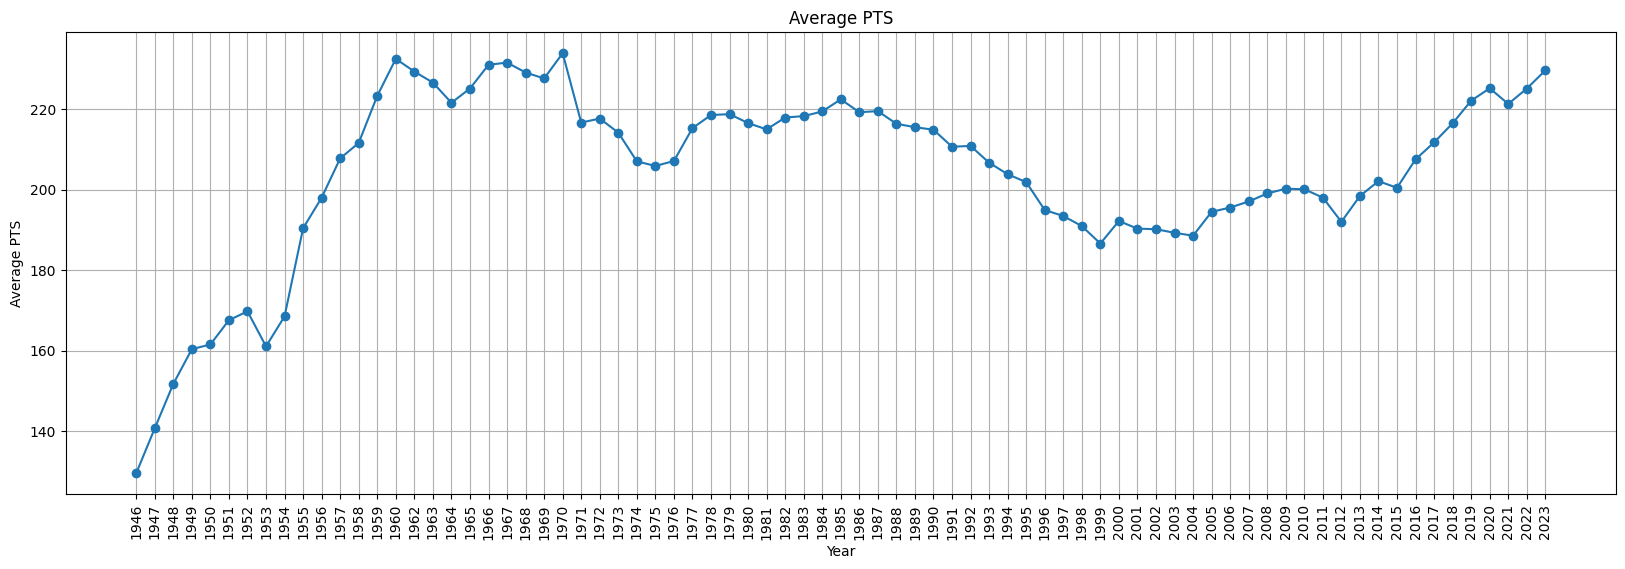

In [7]:
average_scores = regular_playoff.groupby('game_date')['pts_sum'].mean().reset_index()

plt.figure(figsize=(20, 6))
plt.plot(average_scores['game_date'], average_scores['pts_sum'], marker='o')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Average PTS')
plt.title('Average PTS')
plt.grid(True)
plt.show()

### Задание 3

Выполните запрос к таблице draft_history, получив датафрейм.

In [8]:
draft_history = pd.read_csv('draft_history.csv')
draft_history.head()

,person_id,player_name,season,round_number,round_pick,overall_pick,draft_type,team_id,team_city,team_name,team_abbreviation,organization,organization_type,player_profile_flag
0,79299,Clifton McNeeley,1947,1,1,1,Draft,1610610031,Pittsburgh,Ironmen,PIT,Texas-El Paso,College/University,0
1,78109,Glen Selbo,1947,1,2,2,Draft,1610610035,Toronto,Huskies,HUS,Wisconsin,College/University,1
2,76649,Eddie Ehlers,1947,1,3,3,Draft,1610612738,Boston,Celtics,BOS,Purdue,College/University,1
3,79302,Walt Dropo,1947,1,4,4,Draft,1610610032,Providence,Steamrollers,PRO,Connecticut,College/University,0
4,77048,Dick Holub,1947,1,5,5,Draft,1610612752,New York,Knicks,NYK,Long Island-Brooklyn,College/University,1


Постройте график, где по оси X будет год, а по оси Y - количество выбранных игроков в этот год (каждая строка в таблице - выбранный игрок).

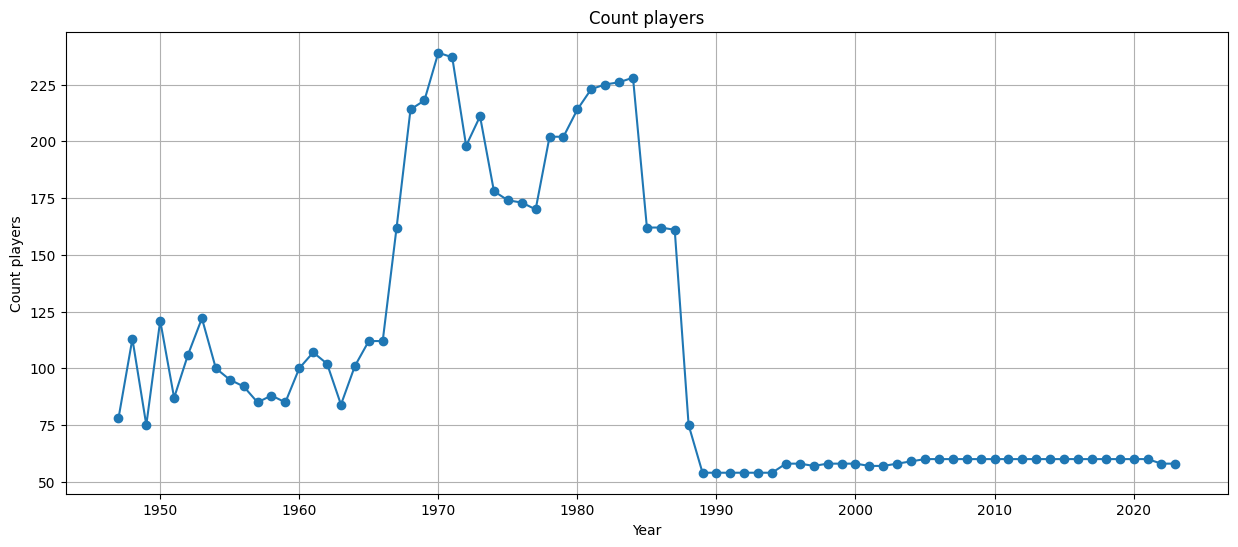

In [9]:
count_players = draft_history.groupby('season')['person_id'].count().reset_index()

plt.figure(figsize=(15, 6))
plt.plot(count_players['season'], count_players['person_id'], marker='o')
plt.xlabel('Year')
plt.ylabel('Count players')
plt.title('Count players')
plt.grid(True)
plt.show()

### Задание 4

Необходимо построить график, показывающий топ 10 школ, игроки из которых были выбраны. Для этого вам понадобятся таблицы common_player_info и draft_history.

In [10]:
common_player_info = pd.read_csv('common_player_info.csv')
common_player_info.head()

,person_id,first_name,last_name,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,...,playercode,from_year,to_year,dleague_flag,nba_flag,games_played_flag,draft_year,draft_round,draft_number,greatest_75_flag
0,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,...,HISTADD_alaa_abdelnaby,1990.0,1994.0,N,Y,Y,1990,1,25,N
1,76002,Zaid,Abdul-Aziz,Zaid Abdul-Aziz,"Abdul-Aziz, Zaid",Z. Abdul-Aziz,zaid-abdul-aziz,1946-04-07 00:00:00,Iowa State,USA,...,HISTADD_zaid_abdul-aziz,1968.0,1977.0,N,Y,Y,1968,1,5,N
2,76003,Kareem,Abdul-Jabbar,Kareem Abdul-Jabbar,"Abdul-Jabbar, Kareem",K. Abdul-Jabbar,kareem-abdul-jabbar,1947-04-16 00:00:00,UCLA,USA,...,HISTADD_kareem_abdul-jabbar,1969.0,1988.0,N,Y,Y,1969,1,1,Y
3,949,Shareef,Abdur-Rahim,Shareef Abdur-Rahim,"Abdur-Rahim, Shareef",S. Abdur-Rahim,shareef-abdur-rahim,1976-12-11 00:00:00,California,USA,...,shareef_abdur-rahim,1996.0,2007.0,N,Y,Y,1996,1,3,N
4,76006,Forest,Able,Forest Able,"Able, Forest",F. Able,forest-able,1932-07-27 00:00:00,Western Kentucky,USA,...,HISTADD_frosty_able,1956.0,1956.0,N,Y,Y,1956,NaN,NaN,N


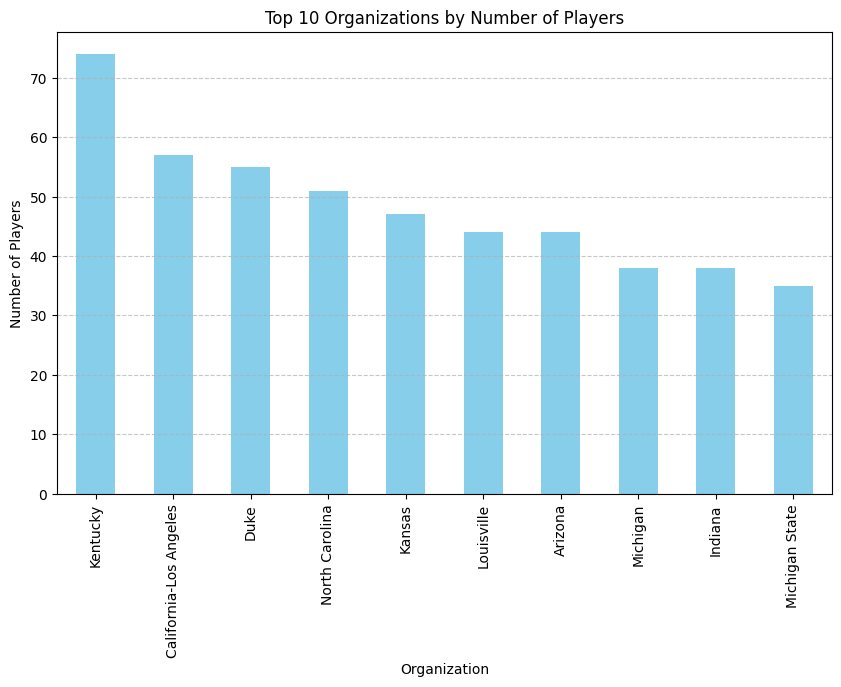

In [11]:
school_merge = pd.merge(common_player_info, draft_history, on='person_id')
organization_counts = school_merge['organization'].value_counts().head(10)

plt.figure(figsize=(10, 6))
organization_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Organization')
plt.ylabel('Number of Players')
plt.title('Top 10 Organizations by Number of Players')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Задание 5

Постройте график сравнения количества выигранных домашних и выездных игр в каждом году. Для этого используйте таблицу game.

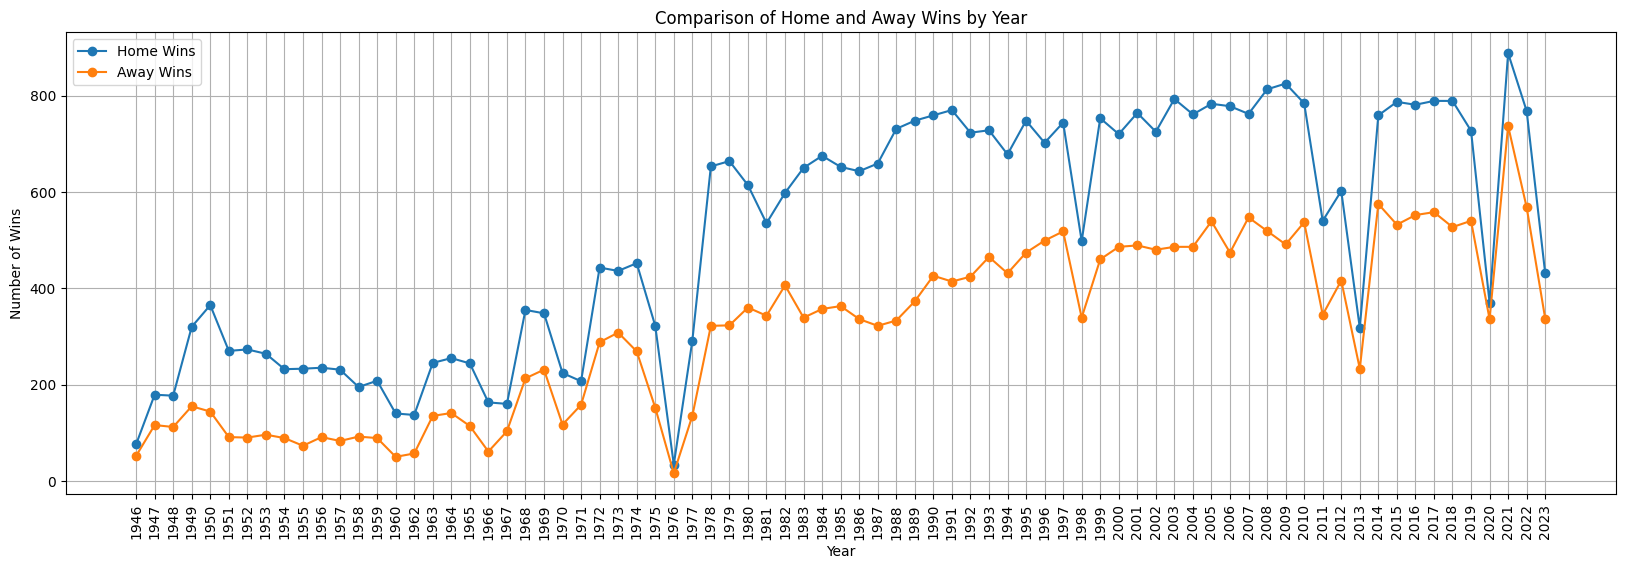

In [12]:
home_wins = regular_playoff[regular_playoff['wl_home'] == 'W'].groupby('game_date').size().reset_index(name='home_wins')
away_wins = regular_playoff[regular_playoff['wl_away'] == 'W'].groupby('game_date').size().reset_index(name='away_wins')

wins_comparison = pd.merge(home_wins, away_wins, on='game_date', how='outer').fillna(0)

plt.figure(figsize=(20, 6))
plt.plot(home_wins['game_date'], home_wins['home_wins'], marker='o', label='Home Wins')
plt.plot(away_wins['game_date'], away_wins['away_wins'], marker='o', label='Away Wins')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Number of Wins')
plt.title('Comparison of Home and Away Wins by Year')
plt.legend()
plt.grid(True)
plt.show()

### Задание 6

Какова средняя продолжительность карьеры активного игрока NBA? Используйте таблицы common_player_info и player. Активный игрок - это тот, у которого в колонке is_active стоит 1.

In [13]:
player = pd.read_csv('player.csv')
player.head()

,id,full_name,first_name,last_name,is_active
0,76001,Alaa Abdelnaby,Alaa,Abdelnaby,0
1,76002,Zaid Abdul-Aziz,Zaid,Abdul-Aziz,0
2,76003,Kareem Abdul-Jabbar,Kareem,Abdul-Jabbar,0
3,51,Mahmoud Abdul-Rauf,Mahmoud,Abdul-Rauf,0
4,1505,Tariq Abdul-Wahad,Tariq,Abdul-Wahad,0


In [14]:
player_merge = pd.merge(common_player_info, player, left_on='person_id', right_on='id')
active_player_NBA = player_merge.loc[(player_merge['is_active'] == 1) & (player_merge['school'].str[:3] == 'NBA')].copy()
active_player_NBA.loc[:, 'career_lenght'] = active_player_NBA['to_year'] - active_player_NBA['from_year']
print(active_player_NBA['career_lenght'].mean())

2.0


### Задание 7

Каково соотношение позиций, на которых играют игроки? Используйте таблицу common_player_info.

In [15]:
position_counts = common_player_info['position'].value_counts()
position_counts / position_counts.sum()

position
Guard             0.394759
Forward           0.364093
Center            0.138556
Guard-Forward     0.037357
Forward-Center    0.031224
Center-Forward    0.018957
Forward-Guard     0.015054
Name: count, dtype: float64